In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_path="C://Users//moham//Downloads//project//python p//Python Foundation Case Study 4 - Python Visualization Case Study//Case Study 4 - Python Visualizations Case Study//"
file_name="SalesData.csv"
salesdata=pd.read_csv(file_path+file_name)
salesdata

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


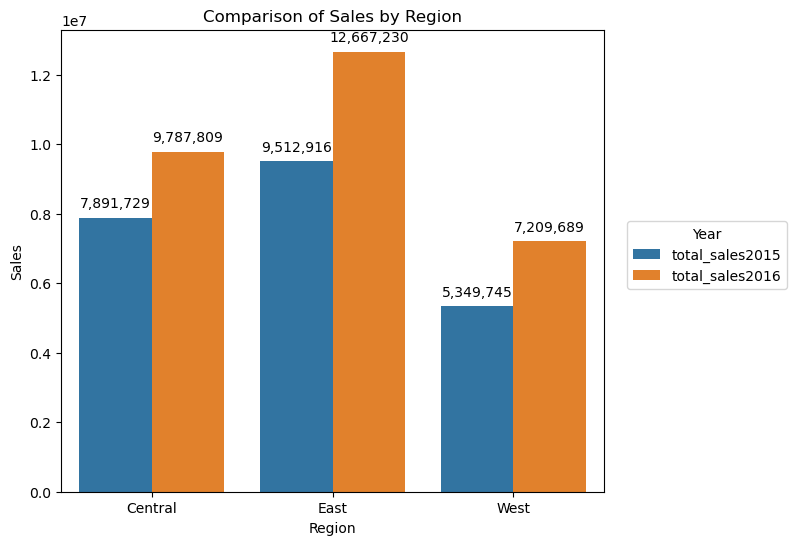

In [3]:
# 1. Compare Sales by region for 2016 with 2015 using bar chart

sales_region=salesdata.groupby(["Region"]).agg(total_sales2015=("Sales2015","sum"),total_sales2016=("Sales2016","sum"))
sales_region=sales_region.reset_index().round(0)
data_long = pd.melt(sales_region, id_vars='Region', var_name='Year', value_name='Sales')
data_long
plt.figure(figsize=(7, 6))
sns.barplot(x='Region', y='Sales', hue='Year', data=data_long, dodge=True)
plt.title("Comparison of Sales by Region")
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title="Year",loc="upper right",bbox_to_anchor=(1.35, 0.6))

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.show()

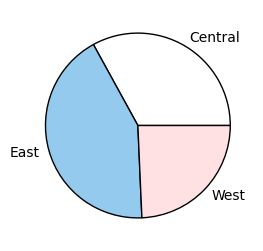

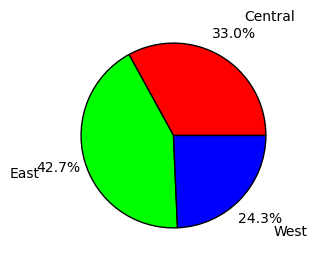

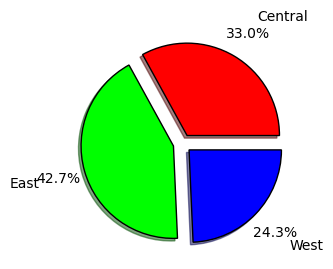

In [4]:
# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

sales_2016=salesdata.groupby(["Region"])["Sales2016"].sum().round(0)
sales_2016=sales_2016.reset_index()
sales_2016
data_long=pd.melt(sales_2016,id_vars="Region",var_name="Sales2016",value_name="Total_Sales")
data_long
plt.figure(figsize=(3,3))
plt.pie(data_long["Total_Sales"],labels=data_long["Region"],autopct="",colors=["white","#93CAED","#FFE0E3"],wedgeprops=dict(edgecolor='black'))
plt.show()
plt.figure(figsize=(3,3))
plt.pie(data_long["Total_Sales"],labels=data_long["Region"],autopct="%1.1f%%",colors=["red","#00ff00","blue"],wedgeprops=dict(edgecolor='black'),pctdistance=1.29,labeldistance=1.5)
plt.show()
plt.figure(figsize=(3,3))
explode=(0.1,0.1,0.1)
plt.pie(data_long["Total_Sales"],labels=data_long["Region"],autopct="%1.1f%%",colors=["red","#00ff00","blue"],wedgeprops=dict(edgecolor='black'),explode =explode,shadow=True,pctdistance=1.29,labeldistance=1.5)
plt.show()

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


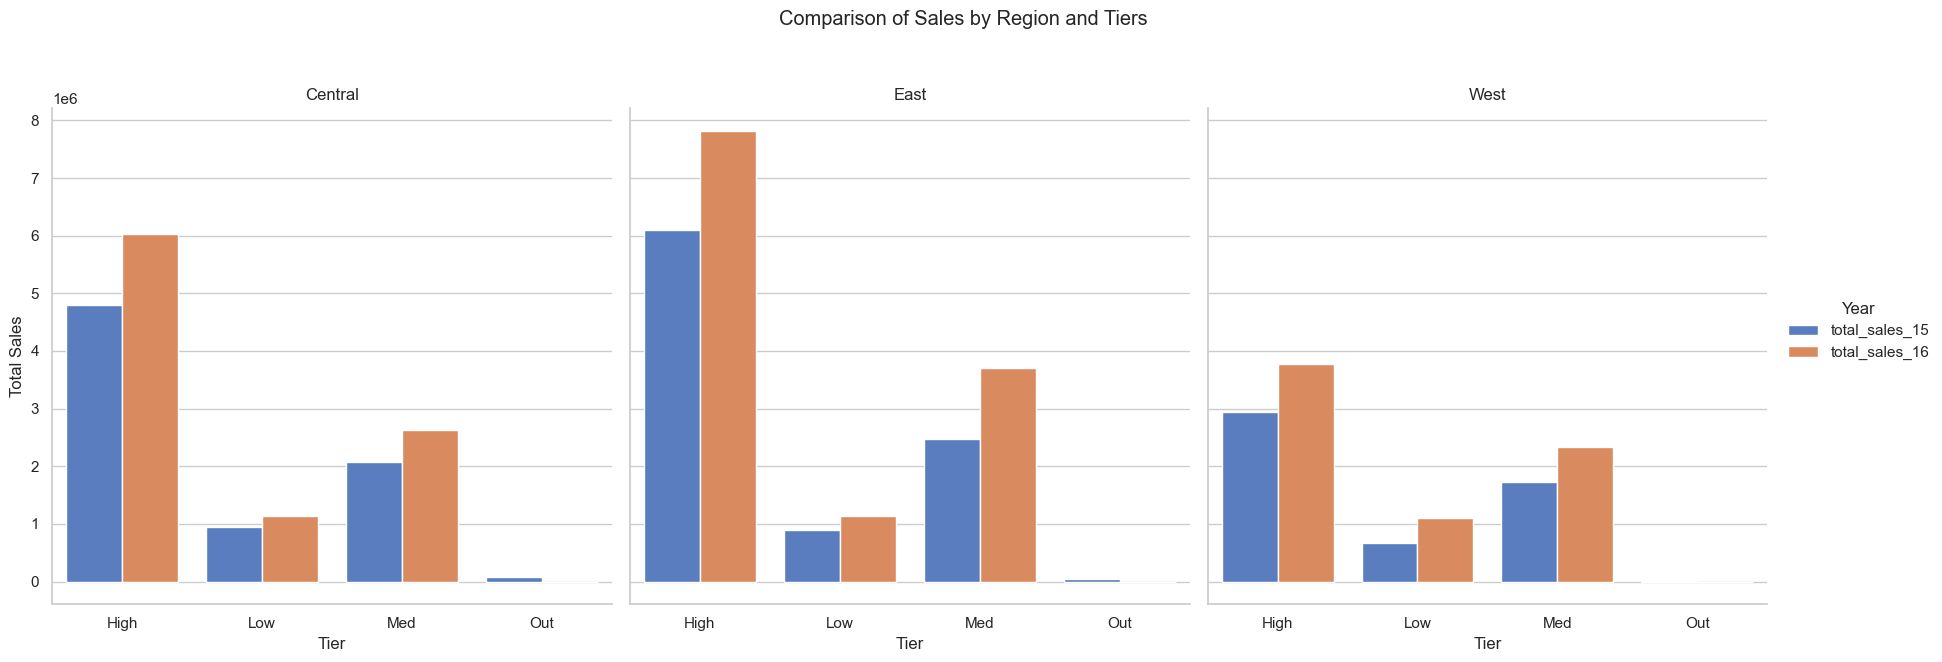

In [5]:
# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

region_tier=salesdata.groupby(["Region","Tier"]).agg(total_sales_15=("Sales2015","sum"),total_sales_16=("Sales2016","sum"))
region_tier=region_tier.reset_index().round(0)
region_tier
data_long=pd.melt(region_tier,id_vars=["Region","Tier"],var_name="Year",value_name="Sales")
data_long

sns.set(style="whitegrid")

g = sns.FacetGrid(data_long, col="Region", col_wrap=3, height=6)

g.map_dataframe(sns.barplot, x='Tier', y='Sales', hue='Year', palette="muted")

g.set_axis_labels("Tier", "Total Sales")
g.set_titles(col_template="{col_name}")

g.add_legend(title='Year')

plt.suptitle("Comparison of Sales by Region and Tiers", y=1.10)

plt.show()

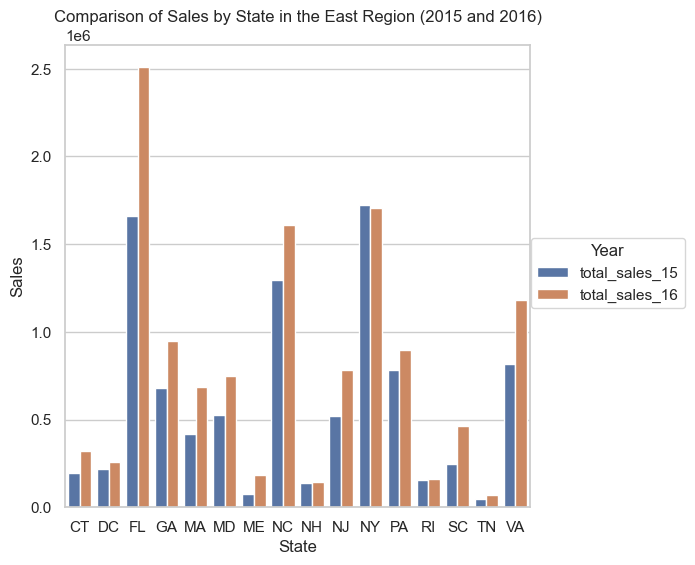

In [6]:
# 4. In East region, which state registered a decline in 2016 as compared to 2015?

east_region=salesdata.groupby(["Region","State"]).agg(total_sales_15=("Sales2015","sum"),total_sales_16=("Sales2016","sum"))
east_region=east_region.reset_index()
east_region=east_region[east_region["Region"] == "East"]
east_region
data_long=pd.melt(east_region,id_vars=["Region","State"],var_name="Year",value_name="Sales")
data_long
plt.figure(figsize=(6,6))
sns.barplot(data_long,x="State",y="Sales",hue="Year")
plt.title("Comparison of Sales by State in the East Region (2015 and 2016)")
plt.legend(title="Year",loc="upper right",bbox_to_anchor=(1.35, 0.6))


plt.show()

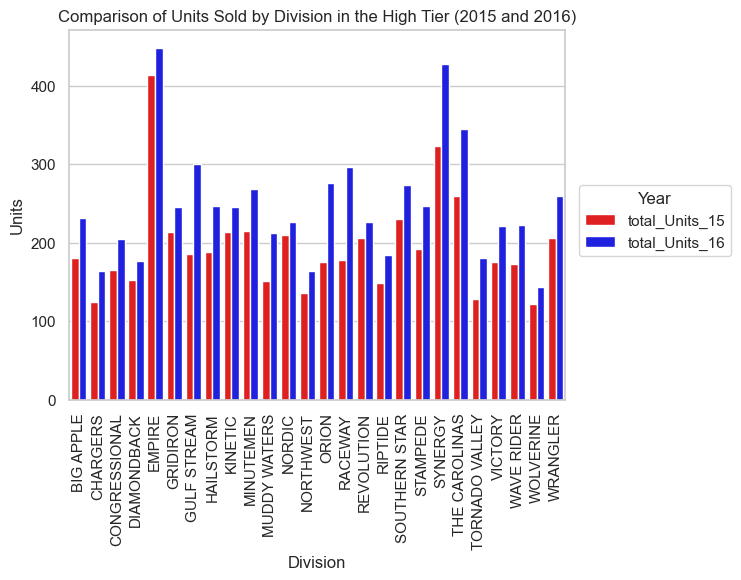

In [7]:
# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

high_tier=salesdata.groupby(["Tier","Division"]).agg(total_Units_15=("Units2015","sum"),total_Units_16=("Units2016","sum"))
high_tier=high_tier.reset_index().round(0)
high_tier=high_tier[high_tier["Tier"]=="High"]
high_tier
data_long=pd.melt(high_tier,id_vars=["Tier","Division"],var_name="Year",value_name="Tot_Units")
data_long

sns.barplot(data_long,x="Division",y="Tot_Units",hue="Year",color="red",palette={"total_Units_15":"red","total_Units_16":"blue"})
plt.legend(title="Year",loc="upper right",bbox_to_anchor=(1.35, 0.6))
plt.xticks(rotation=90)
plt.title("Comparison of Units Sold by Division in the High Tier (2015 and 2016)")
plt.ylabel("Units")
plt.show()

In [8]:
# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported
# dataset. The Quarters are based on months and defined as -
# • Jan - Mar : Q1
# • Apr - Jun : Q2
# • Jul - Sep : Q3
# • Oct - Dec : Q4

quarter_mapping={"Jan":"Q1","Feb":"Q1","Mar":"Q1",
                "Apr":"Q2","May":"Q2","Jun":"Q2",
                "Jul":"Q3","Aug":"Q3","Sep":"Q3",
                "Oct":"Q4","Nov":"Q4","Dec":"Q4"}
salesdata["Qtr"]=salesdata["Month"].map(quarter_mapping)
salesdata

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


Text(0.5, 1.0, 'Comparsion of Qtr wise sales in 2015 and 2016')

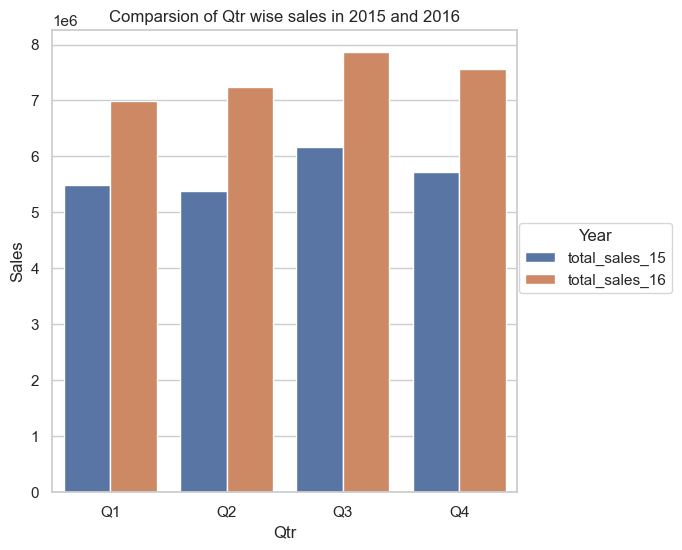

In [9]:
# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

qtr_wise=salesdata.groupby(["Qtr"]).agg(total_sales_15=("Sales2015","sum"),total_sales_16=("Sales2016","sum"))
qtr_wise=qtr_wise.reset_index().round(0)
qtr_wise
data_long=pd.melt(qtr_wise,id_vars="Qtr",var_name="Year",value_name="Sales")
data_long
plt.figure(figsize=(6,6))
sns.barplot(data_long,x="Qtr",y="Sales",hue="Year")
plt.legend(title="Year",loc="upper right",bbox_to_anchor=(1.35,0.6))
plt.title("Comparsion of Qtr wise sales in 2015 and 2016")

C:\Users\moham\AppData\Local\Temp\ipykernel_19892\2458718802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qtr_tier3["Sales2016"] =qtr_tier3["Sales2016"].apply(lambda x: 0 if x < 0 else x)


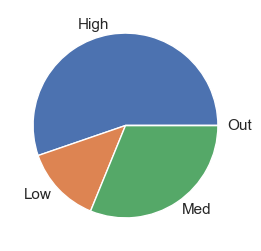

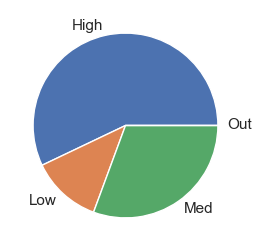

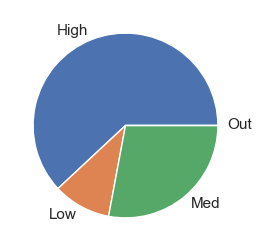

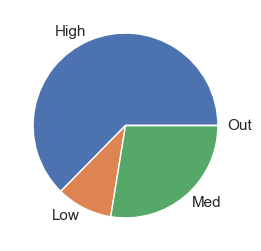

In [10]:
# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie
# chart. (Draw 4 pie charts representing a Quarter for each Tier)

qtr_tier=salesdata.groupby(["Qtr","Tier"])["Sales2016"].sum()
qtr_tier=qtr_tier.reset_index().round(0)
qtr_tier1=qtr_tier[qtr_tier["Qtr"]=="Q1"]
qtr_tier2=qtr_tier[qtr_tier["Qtr"]=="Q2"]
qtr_tier3=qtr_tier[qtr_tier["Qtr"]=="Q3"]
qtr_tier3["Sales2016"] =qtr_tier3["Sales2016"].apply(lambda x: 0 if x < 0 else x)

qtr_tier4=qtr_tier[qtr_tier["Qtr"]=="Q4"]

plt.figure(figsize=(3,3))
plt.pie(qtr_tier1["Sales2016"],labels=qtr_tier1["Tier"])
plt.show()

plt.figure(figsize=(3,3))
plt.pie(qtr_tier2["Sales2016"],labels=qtr_tier2["Tier"])
plt.show()

plt.figure(figsize=(3,3))
plt.pie(qtr_tier3["Sales2016"],labels=qtr_tier3["Tier"])
plt.show()

plt.figure(figsize=(3,3))
plt.pie(qtr_tier4["Sales2016"],labels=qtr_tier4["Tier"])
plt.show()